In [66]:
#!pip install hplc-py

In [67]:
# Support for math
import numpy as np

# Plotting tools
from matplotlib import pyplot as plt
import matplotlib as mplt

import warnings
warnings.filterwarnings('ignore')

#Data frames tools
import pandas as pd
import os

from scipy.signal import find_peaks

from hplc.quant import Chromatogram

In [68]:
#df_summary = pd.read_excel("/Users/clarat/Documents/Sun_Lab/PNNL/2002 Design Summary Sheet.xlsx") #2002 summary
df_summary = pd.read_excel("/Users/clarat/Documents/Sun_Lab/PNNL/208590_ESMI Synthesis EXPERIMENT LOG6a37cb242d3e0142ead426d85c590b82b20ece59623cbc8e445d91ce28a08e63.xlsx",sheet_name='2006')
df_summary.head()

Design ID  Library ID  Vial ID  \
0       2006      102119        1   
1       2006      102119        2   
2       2006      102119        3   
3       2006      102119        4   
4       2006      102119        5   

   Reagent Ratio\n(mg/mL reagent/sulfonating agent)  Sulfonating Agent\n(wt%)  \
0                                                84                        89   
1                                                84                        89   
2                                                84                        89   
3                                                97                        95   
4                                                97                        95   

   Temperature (degC)  Sample Time (min) Model Design ID  
0                  45                 49               2  
1                  45                 49               2  
2                  45                 49               2  
3                  95                 87               8  
4                  95                 87               8

In [69]:
# df = pd.read_csv("/Users/clarat/Documents/Sun Lab/PNNL/102107 UV Spectra/102107 (1).csv",skiprows=1)
# df.head()

In [70]:
import fnmatch
import re

# get the CSV files only
# Get the CSV files only
files = fnmatch.filter(os.listdir('/Users/clarat/Documents/Sun_Lab/PNNL/102119 HPLC Data'), '*.csv')
#files = fnmatch.filter(os.listdir('/Users/clarat/Documents/Sun Lab/PNNL/102107 UV Spectra'), '*.csv')

# Sort files based on the second number in the filename
sorted_files = sorted(files, key=lambda s: int(re.findall(r'\d+', s)[1]) if len(re.findall(r'\d+', s)) >= 2 else 0)

print(sorted_files)



['102119 (1).csv', '102119 (2).csv', '102119 (3).csv', '102119 (4).csv', '102119 (5).csv', '102119 (6).csv', '102119 (7).csv', '102119 (8).csv', '102119 (9).csv', '102119 (10).csv', '102119 (11).csv', '102119 (12).csv', '102119 (13).csv', '102119 (14).csv', '102119 (15).csv', '102119 (16).csv', '102119 (17).csv', '102119 (18).csv', '102119 (19).csv', '102119 (20).csv', '102119 (21).csv', '102119 (22).csv', '102119 (23).csv', '102119 (24).csv', '102119 (25).csv', '102119 (26).csv', '102119 (27).csv', '102119 (28).csv', '102119 (29).csv', '102119 (30).csv', '102119 (31).csv', '102119 (32).csv', '102119 (33).csv', '102119 (34).csv', '102119 (35).csv', '102119 (36).csv', '102119 (37).csv', '102119 (38).csv', '102119 (39).csv', '102119 (40).csv', '102119 (41).csv', '102119 (42).csv', '102119 (43).csv', '102119 (44).csv', '102119 (45).csv', '102119 (46).csv', '102119 (47).csv', '102119 (48).csv']


In [71]:
df = pd.read_csv('/Users/clarat/Documents/Sun_Lab/PNNL/102119 HPLC Data/102119 (2).csv',skiprows=1, sep='\t').columns.item()
df


'102119_02'

In [72]:
#read them into pandas
columns_list = [pd.read_csv('/Users/clarat/Documents/Sun_Lab/PNNL/102119 HPLC Data/'+files,skiprows=1, sep='\t').columns.item() for files in sorted_files]

df_list = [pd.read_csv('/Users/clarat/Documents/Sun_Lab/PNNL/102119 HPLC Data/'+ sorted_files[i],skiprows=2, sep='\t',names=['X%s'%columns_list[i],'Y%s'%columns_list[i]]).dropna(axis=1, how='all') for i in range(len(sorted_files))]
# df_columns = [df_list[i].columns.item() for i in range(len(df_list))]

# #

# len(df_list)

# df_list
df_list

[     X102119_01  Y102119_01
 0      0.000000    0.000000
 1      0.016667    0.000000
 2      0.033333    0.000000
 3      0.050000    0.000000
 4      0.066667    0.000000
 ..          ...         ...
 416    6.933333    0.000396
 417    6.950000    0.000390
 418    6.966667    0.000385
 419    6.983333    0.000380
 420    7.000000    0.000376
 
 [421 rows x 2 columns],
      X102119_02  Y102119_02
 0      0.000000    0.000000
 1      0.016667    0.000000
 2      0.033333    0.000000
 3      0.050000    0.000000
 4      0.066667    0.000000
 ..          ...         ...
 416    6.933333    0.000206
 417    6.950000    0.000199
 418    6.966667    0.000192
 419    6.983333    0.000185
 420    7.000000    0.000179
 
 [421 rows x 2 columns],
      X102119_03  Y102119_03
 0      0.000000    0.000000
 1      0.016667    0.000000
 2      0.033333    0.000000
 3      0.050000    0.000000
 4      0.066667    0.000000
 ..          ...         ...
 416    6.933333    0.000201
 417    6.950000  

In [73]:
#df_list = [df_list[i].rename(columns={"": "X%s"%sorted_files[i], df_columns[i]: "Y%s"%sorted_files[i]}) for i in range(len(df_list))]
#df_list = [df_list[i].rename(columns={"": "X%s"%sorted_files[i]}) for i in range(len(df_list))]


In [74]:
big_df = pd.concat(df_list,axis=1)
big_df


X102119_01  Y102119_01  X102119_02  Y102119_02  X102119_03  Y102119_03  \
0      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1      0.016667    0.000000    0.016667    0.000000    0.016667    0.000000   
2      0.033333    0.000000    0.033333    0.000000    0.033333    0.000000   
3      0.050000    0.000000    0.050000    0.000000    0.050000    0.000000   
4      0.066667    0.000000    0.066667    0.000000    0.066667    0.000000   
..          ...         ...         ...         ...         ...         ...   
416    6.933333    0.000396    6.933333    0.000206    6.933333    0.000201   
417    6.950000    0.000390    6.950000    0.000199    6.950000    0.000195   
418    6.966667    0.000385    6.966667    0.000192    6.966667    0.000190   
419    6.983333    0.000380    6.983333    0.000185    6.983333    0.000185   
420    7.000000    0.000376    7.000000    0.000179    7.000000    0.000179   

     X102119_04  Y102119_04  X102119_05  Y102119_05  ...  X102119_44  \
0      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
1      0.016667    0.000000    0.016667    0.000000  ...    0.016667   
2      0.033333    0.000000    0.033333    0.000000  ...    0.033333   
3      0.050000    0.000000    0.050000    0.000000  ...    0.050000   
4      0.066667    0.000000    0.066667    0.000000  ...    0.066667   
..          ...         ...         ...         ...  ...         ...   
416    6.933333    0.000221    6.933333    0.000251  ...    6.933333   
417    6.950000    0.000214    6.950000    0.000242  ...    6.950000   
418    6.966667    0.000206    6.966667    0.000233  ...    6.966667   
419    6.983333    0.000198    6.983333    0.000225  ...    6.983333   
420    7.000000    0.000191    7.000000    0.000217  ...    7.000000   

     Y102119_44  X102119_45  Y102119_45  X102119_46  Y102119_46  X102119_47  \
0      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1      0.000000    0.016667    0.000000    0.016667    0.000000    0.016667   
2      0.000000    0.033333    0.000000    0.033333    0.000000    0.033333   
3      0.000000    0.050000    0.000000    0.050000    0.000000    0.050000   
4      0.000000    0.066667    0.000000    0.066667    0.000000    0.066667   
..          ...         ...         ...         ...         ...         ...   
416    0.000234    6.933333    0.000233    6.933333    0.000232    6.933333   
417    0.000227    6.950000    0.000226    6.950000    0.000225    6.950000   
418    0.000219    6.966667    0.000219    6.966667    0.000217    6.966667   
419    0.000211    6.983333    0.000212    6.983333    0.000208    6.983333   
420    0.000203    7.000000    0.000204    7.000000    0.000201    7.000000   

     Y102119_47  X102119_48  Y102119_48  
0      0.000000    0.000000    0.000000  
1      0.000000    0.016667    0.000000  
2      0.000000    0.033333    0.000000  
3      0.000000    0.050000    0.000000  
4      0.000000    0.066667    0.000000  
..          ...         ...         ...  
416    0.000240    6.933333    0.000243  
417    0.000232    6.950000    0.000235  
418    0.000224    6.966667    0.000228  
419    0.000215    6.983333    0.000220  
420    0.000206    7.000000    0.000212  

[421 rows x 96 columns]

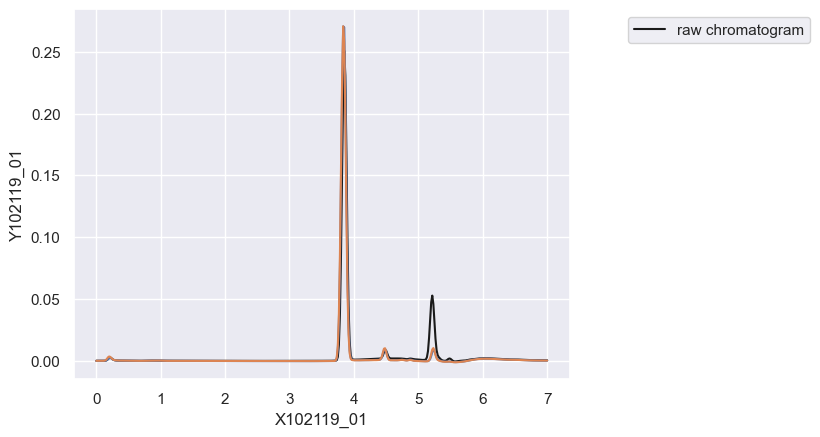

In [75]:
Chromatogram(big_df, cols={'time':'X%s'%columns_list[0], 'signal':'Y%s'%columns_list[0]}).show()
plt.plot(big_df['X102119_02'],big_df['Y102119_02'])
plt.plot(big_df['X102119_03'],big_df['Y102119_03'])
# plt.plot(big_df['X102107_EXP Product.csv'],big_df['Y102107_EXP Product.csv'])
# plt.plot(big_df['X102107_EXP Blank.csv'],big_df['Y102107_EXP Blank.csv'])

In [76]:
def plot_spec(id):
  data = [big_df['X%s'%columns_list[id]],big_df['Y%s'%columns_list[id]]]
  #norm_y = (big_df['Y%s'%sorted_files[id]] - big_df['Y%s'%sorted_files[id]].min()) / (big_df['Y%s'%sorted_files[id]].max() - big_df['Y%s'%sorted_files[id]].min())
  peaks, _ = find_peaks(data[1], prominence=0.005)
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(data[0],data[1])#,c=col)
  #plt.plot(data[0],norm_y)#,c=col)
  plt.vlines(data[0].values[peaks], 0, np.max(data[1]), linestyle='--', color='tab:grey')#'dodgerblue'
  #plt.title('%s'%sorted_files[id])
  plt.title('%s'%columns_list[id])#len(peaks))


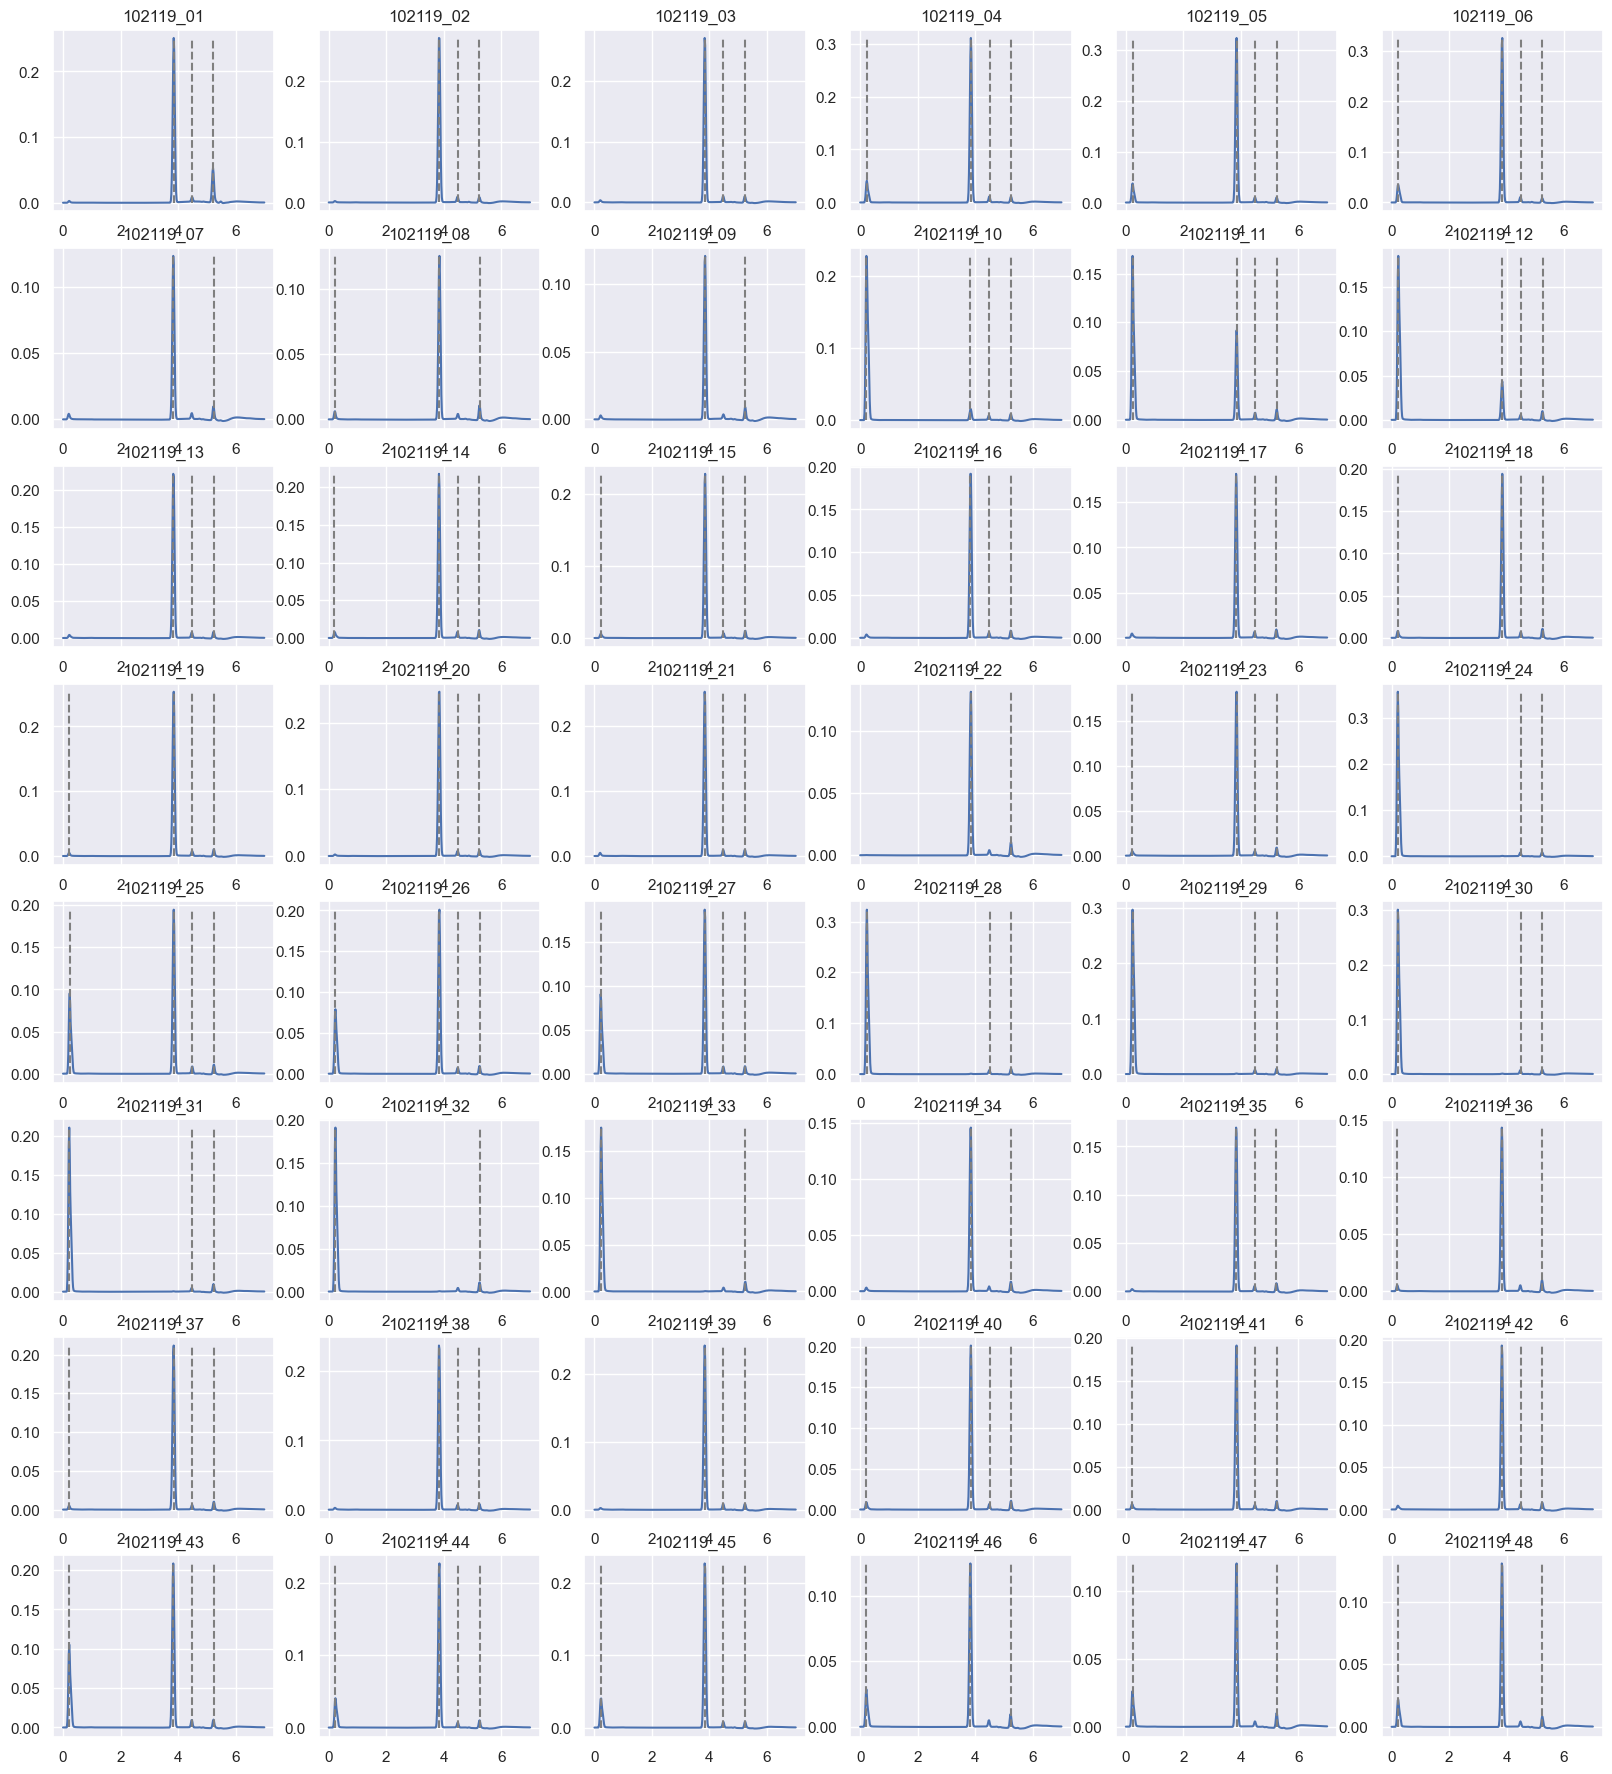

In [77]:
#plot the normalized spectra
fig = plt.figure(figsize=(20,25))
#Spectra vs Weights
for i in range(0,len(df_list)):
  plt.subplot(1+len(df_list)//6,6,i+1)
  plot_spec(i)

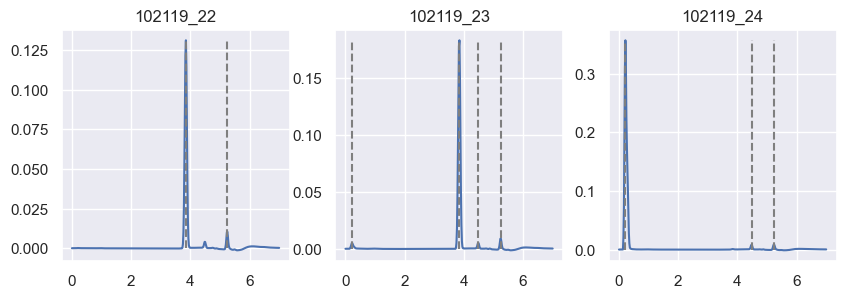

In [78]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plot_spec(21)
plt.subplot(1,3,2)
plot_spec(22)
plt.subplot(1,3,3)
plot_spec(23)

In [79]:
import scipy.signal
all_peak = np.zeros([big_df.shape[1]//2,6])
all_peak_x = np.zeros([big_df.shape[1]//2,6])
prod_peak = np.zeros(big_df.shape[1]//2)
react_peak = np.zeros(big_df.shape[1]//2)
acid_peak = np.zeros(big_df.shape[1]//2)

for i in range(big_df.shape[1]//2):
    # Create a normalized signal
    x = big_df['X%s'%columns_list[i]]
    y = big_df['Y%s'%columns_list[i]]
    #signal_norm = (df['signal'] - df['signal'].min()) / (df['signal'].max() - df['signal'].min())
    norm_y = (big_df['Y%s'%columns_list[i]] - big_df['Y%s'%columns_list[i]].min()) / (big_df['Y%s'%columns_list[i]].max() - big_df['Y%s'%columns_list[i]].min())

    # Find peaks with a low prominence filter of 0.01
    #peak_locations, _ = scipy.signal.find_peaks(y, prominence=0.001)
    peak_locations, _ = scipy.signal.find_peaks(norm_y, prominence=0.01)
    for j, peak in enumerate(peak_locations):
        #print(peak_locations.shape)
        all_peak[i,j] = y[peak]
        all_peak_x[i,j] = x[peak]

        if x[peak] > 0.0 and x[peak] < 0.5:
            prod_peak[i] = y[peak]

        elif x[peak] > 3.0 and x[peak] < 4.5:
            react_peak[i]  = y[peak]

        elif x[peak] > 5 and x[peak] < 5.5:
            acid_peak[i] = y[peak]
        else: 
            None



In [80]:
ratio = np.nan_to_num(react_peak/prod_peak)
ratio

array([3.18967283e+000, 1.79769313e+308, 2.91881966e+000, 7.57349228e+000,
       2.74186399e-001, 3.14129020e-001, 1.11981153e+000, 6.55294191e-001,
       1.25987784e+000, 2.90668914e-002, 5.45321372e-001, 3.07363767e-002,
       1.86602631e+000, 9.93948020e-001, 1.12878782e+000, 1.59789862e+000,
       1.44438837e+000, 2.38005847e+001, 1.53198582e+000, 1.79769313e+308,
       1.91874575e+000, 1.79769313e+308, 1.03233528e+000, 2.27895768e-002,
       2.03933345e+000, 9.42007001e-002, 8.92006655e-002, 0.00000000e+000,
       2.56393808e-002, 2.42749970e-002, 2.29681833e-002, 0.00000000e+000,
       2.32158220e-002, 1.33967916e+000, 2.38221249e+000, 9.64717960e-001,
       1.17889900e+000, 2.67245546e+000, 3.50114591e+000, 2.21906098e+001,
       8.52082541e-001, 1.42680226e+000, 9.02202885e-002, 1.76517741e-001,
       2.00617405e-001, 1.72615922e-001, 1.47606402e-001, 1.99425341e-001])

In [81]:
for data_size in range(big_df.shape[1]//2):
    norm_y = (big_df['Y%s'%columns_list[data_size]] - big_df['Y%s'%columns_list[data_size]].min()) / (big_df['Y%s'%columns_list[data_size]].max() - big_df['Y%s'%columns_list[data_size]].min())

# Find peaks with a low prominence filter of 0.01
peak_locations, _ = scipy.signal.find_peaks(norm_y, prominence=0.01)
for i in peak_locations:
    if x[i] > 0.2 and x[i] < 0.4:
        print(x[i],y[i])
    elif x[i] > 3.0 and x[i] < 4.5:
        print(x[i],y[i])
    elif x[i] > 5 and x[i] < 5.5:
        print(x[i],y[i])
    else: 
        print('other', x[i],y[i])


0.2333333 0.02157629
3.833333 0.1304175
4.483333 0.004302859
5.233333 0.008232474


Performing baseline correction:   0%|          | 0/149 [00:00<?, ?it/s]

Deconvolving mixture: 100%|██████████| 2/2 [00:00<00:00, 37.94it/s]


retention_time     scale      skew  amplitude      area  peak_id
0             3.9  0.044047 -0.764124   0.013128  0.787672        1
0             4.5  0.060949 -2.325896   0.000419  0.025112        2
0             5.2  0.050859  1.782690   0.001068  0.064059        3

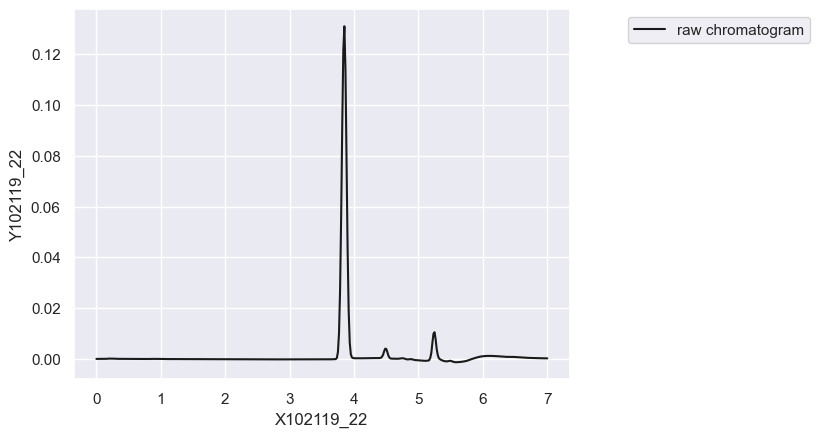

In [82]:
peak_prod= Chromatogram(big_df, cols={'time':'X%s'%columns_list[21], 'signal':'Y%s'%columns_list[21]})
#peaks_react = Chromatogram(big_df, cols={'time':'X102107_EXP Mix.csv', 'signal':'Y102107_EXP Mix.csv'},time_window=[3,4.5]).fit_peaks(prominence=0.0)['area']#<- this worked...
peak_prod.show()
peak_prod.fit_peaks(prominence=0.02)

In [83]:
def fit_peak_range(min, max,filter):
    peak_list = []
    for i in range(big_df.shape[1]//2):
        #print(i)
        #signal_norm = (big_df['Y%s'%sorted_files[i]] - big_df['Y%s'%sorted_files[i]].min()) / (big_df['Y%s'%sorted_files[i]].max() - big_df['Y%s'%sorted_files[i]].min())
        chrom = Chromatogram(big_df, cols={'time':'X%s'%columns_list[i], 'signal':'Y%s'%columns_list[i]},time_window=[min,max])
        chrom.correct_baseline()
        #print(i)
        peak_list.append(chrom.fit_peaks(prominence=filter))
        # if i ==21:
        #     peak_list.append(chrom.fit_peaks(prominence=filter))
        # # elif i  == 31:
        # #     peak_list.append(chrom.fit_peaks(prominence=0.06))
        # else: 
        #     peak_list.append(chrom.fit_peaks())
    return peak_list


In [84]:
list_all = fit_peak_range(0, 7, 0.02)
list_all

Deconvolving mixture: 100%|██████████| 3/3 [00:00<00:00, 75.35it/s]


[   retention_time     scale      skew  amplitude      area  peak_id
 0             3.9  0.043860 -0.762522   0.025098  1.505862        1
 0             4.4  0.268028  2.021470   0.001826  0.109588        2
 0             5.2  0.051169  1.351787   0.005273  0.316391        3,
    retention_time     scale      skew  amplitude      area  peak_id
 0             3.9  0.042407 -0.689221   0.027079  1.624728        1
 0             4.5  0.057355 -1.817490   0.000970  0.058175        2
 0             5.2  0.054926  1.894129   0.000906  0.054369        3,
    retention_time     scale      skew  amplitude      area  peak_id
 0             3.9  0.043622 -0.751849   0.027092  1.625516        1
 0             4.5  0.055496 -1.823321   0.001039  0.062356        2
 0             5.2  0.054759  1.973882   0.001053  0.063200        3,
    retention_time     scale      skew  amplitude      area  peak_id
 0             0.2  0.068904  3.410997   0.004102  0.246107        1
 0             3.9  0.044169 -0

In [85]:
list_product = fit_peak_range(0, 0.5, 0.05)

Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00, 95.94it/s]


In [86]:
list_product[0]
indices = np.where(list_product[0] == 0.2)
list_product[0].iloc[indices[0].item(),indices[1].item()]
list_product[14]#['amplitude'].iloc[indices[0].item()]
list_product[14] == 0.2

retention_time  scale   skew  amplitude   area  peak_id
0            True  False  False      False  False    False

In [87]:
list_acid = fit_peak_range(5, 5.5, 0.05)
#list_acid = [list_acid[i]['area'].item() for i in range(len(list_acid))]

Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00, 125.87it/s]


In [88]:
list_reactant = fit_peak_range(3.5, 4, 0.2)

Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00, 87.09it/s]


# NOTE
Product = 0.29 min RT

Reactant = 3.92 min RT

Sulfuric Acid = 5.25 min RT

All other peaks are potential side products
Area counts for compounds can assume intersection at origin and 8910360 = 0.053 g/ml

# amplitude


In [89]:
def select_peaks_amp(value,peak_list):
    array = np.zeros(len(peak_list))
    for i in range(len(peak_list)):
        if (peak_list[i]['retention_time'] == value).any() == True:
            indices = np.where(peak_list[i] == value)
            array[i] = peak_list[i]['amplitude'].iloc[indices[0].item()]
        else:
            array[i] = 0
    return array


# areas

In [90]:
def select_peaks_area(value,peak_list):
    array = np.zeros(len(peak_list))
    for i in range(len(peak_list)):
        if (peak_list[i]['retention_time'] == value).any() == True:
            indices = np.where(peak_list[i] == value)
            array[i] = peak_list[i]['area'].iloc[indices[0].item()]
        else:
            array[i] = 0
    return array

#acid_peak = select_peaks_area(5.2)[3:]
product_area = select_peaks_area(0.2,list_product)
acid_area = select_peaks_area(5.2,list_all)
reactant_area = select_peaks_area(3.9,list_reactant )+select_peaks_area(3.8,list_reactant )
unknown_area = select_peaks_area(4.5,list_all)+select_peaks_area(4.4,list_all)
acid_area ,product_area, reactant_area

(array([0.31639141, 0.05436945, 0.06319997, 0.06740286, 0.0610106 ,
        0.05185175, 0.06042051, 0.06626557, 0.05408549, 0.05230093,
        0.06558825, 0.05998278, 0.0523653 , 0.06433795, 0.06093693,
        0.05103207, 0.05611181, 0.06571481, 0.06361631, 0.05110216,
        0.06014156, 0.06405905, 0.05463267, 0.05437803, 0.06584501,
        0.05733848, 0.05171586, 0.06476927, 0.05960799, 0.05073881,
        0.0600028 , 0.06569198, 0.06331584, 0.05161143, 0.05188966,
        0.06033182, 0.06188394, 0.05035543, 0.05485153, 0.06543444,
        0.06004   , 0.05059219, 0.06067657, 0.06079602, 0.05024386,
        0.05965304, 0.06164435, 0.05049276]),
 array([1.59480650e-02, 1.32899090e-02, 2.05851598e-02, 2.45528603e-01,
        2.24925635e-01, 2.19560021e-01, 2.49154911e-02, 3.71418947e-02,
        1.72858118e-02, 1.41159602e+00, 1.00849711e+00, 1.10782851e+00,
        2.42251079e-02, 4.73040339e-02, 3.51307261e-02, 2.28036010e-02,
        2.73021752e-02, 4.85901617e-02, 2.96583648e-02

In [91]:
time = np.array([element for element in  df_summary['Sample Time (min)']])
time = np.hstack([time[:21],time[24:]])

temp = np.array([element for element in  df_summary['Temperature (degC)']])
temp = np.hstack([temp[:21],temp[24:]])

sulfonating_agent= np.array([element for element in  df_summary['Sulfonating Agent\n(wt%)']])
sulfonating_agent= np.hstack([sulfonating_agent[:21],sulfonating_agent[24:]])

analyte = np.array([element for element in  df_summary['Reagent Ratio\n(mg/mL reagent/sulfonating agent)']])
analyte= np.hstack([analyte[:21],analyte[24:]])

product = np.hstack([product_area[:21],product_area[24:]])
reactant = np.hstack([reactant_area[:21],reactant_area[24:]])
unknown = np.hstack([unknown_area[:21],unknown_area[24:]])


total = product + reactant + unknown
yield_prod = product/ total
yield_react = reactant/ total
yield_unknown = unknown/ total


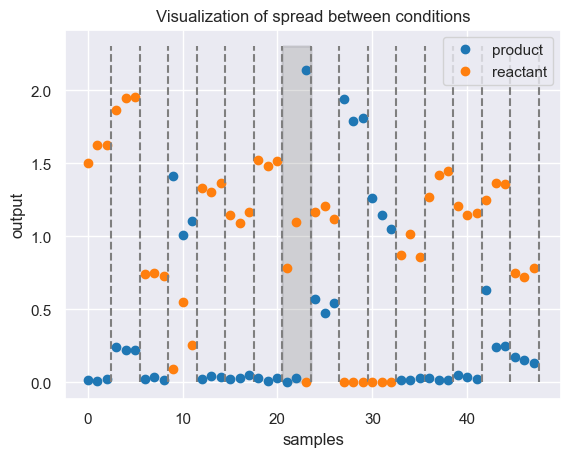

In [92]:
#plt.plot(acid_area)
# plt.plot(product_area,'.')
# plt.plot(reactant_area,'.')
# Plot the data with different colors for every three points
np.random.seed(41)
for i in range(0, len(product_area), 3):
    color1 = plt.cm.spring(i / len(product_area))  # Generate a color from the colormap
    color2 =  plt.cm.winter(i / len(reactant_area))  # Generate a color from the colormap
    #color = np.random.rand(3,) #random color
    plt.plot(range(i, i+3),product_area[i:i+3], color='tab:blue',marker='o', linestyle='')
    plt.plot(range(i, i+3),reactant_area[i:i+3], color='tab:orange',marker='o', linestyle='')
    plt.vlines(i+2.5, 0, 2.3, linestyle='--', color='tab:grey')#'dodgerblue'
    plt.fill_betweenx(np.linspace(0, 2.3, 100),21-0.5,24-0.5,color='tab:grey', alpha=0.01)
    #plt.plot(range(i, i+3),reactant_area[i:i+3], color=color1,marker='o', linestyle='')
    #plt.plot(range(i, i+3),(product_area/reactant_area)[i:i+3], color=color1,marker='o', linestyle='')
    #plt.plot(range(i, i+3),unknown_area[i:i+3], color=color1,marker='o', linestyle='')

plt.title('Visualization of spread between conditions')
plt.xlabel('samples')
plt.ylabel('output')
plt.legend(['product','reactant'])


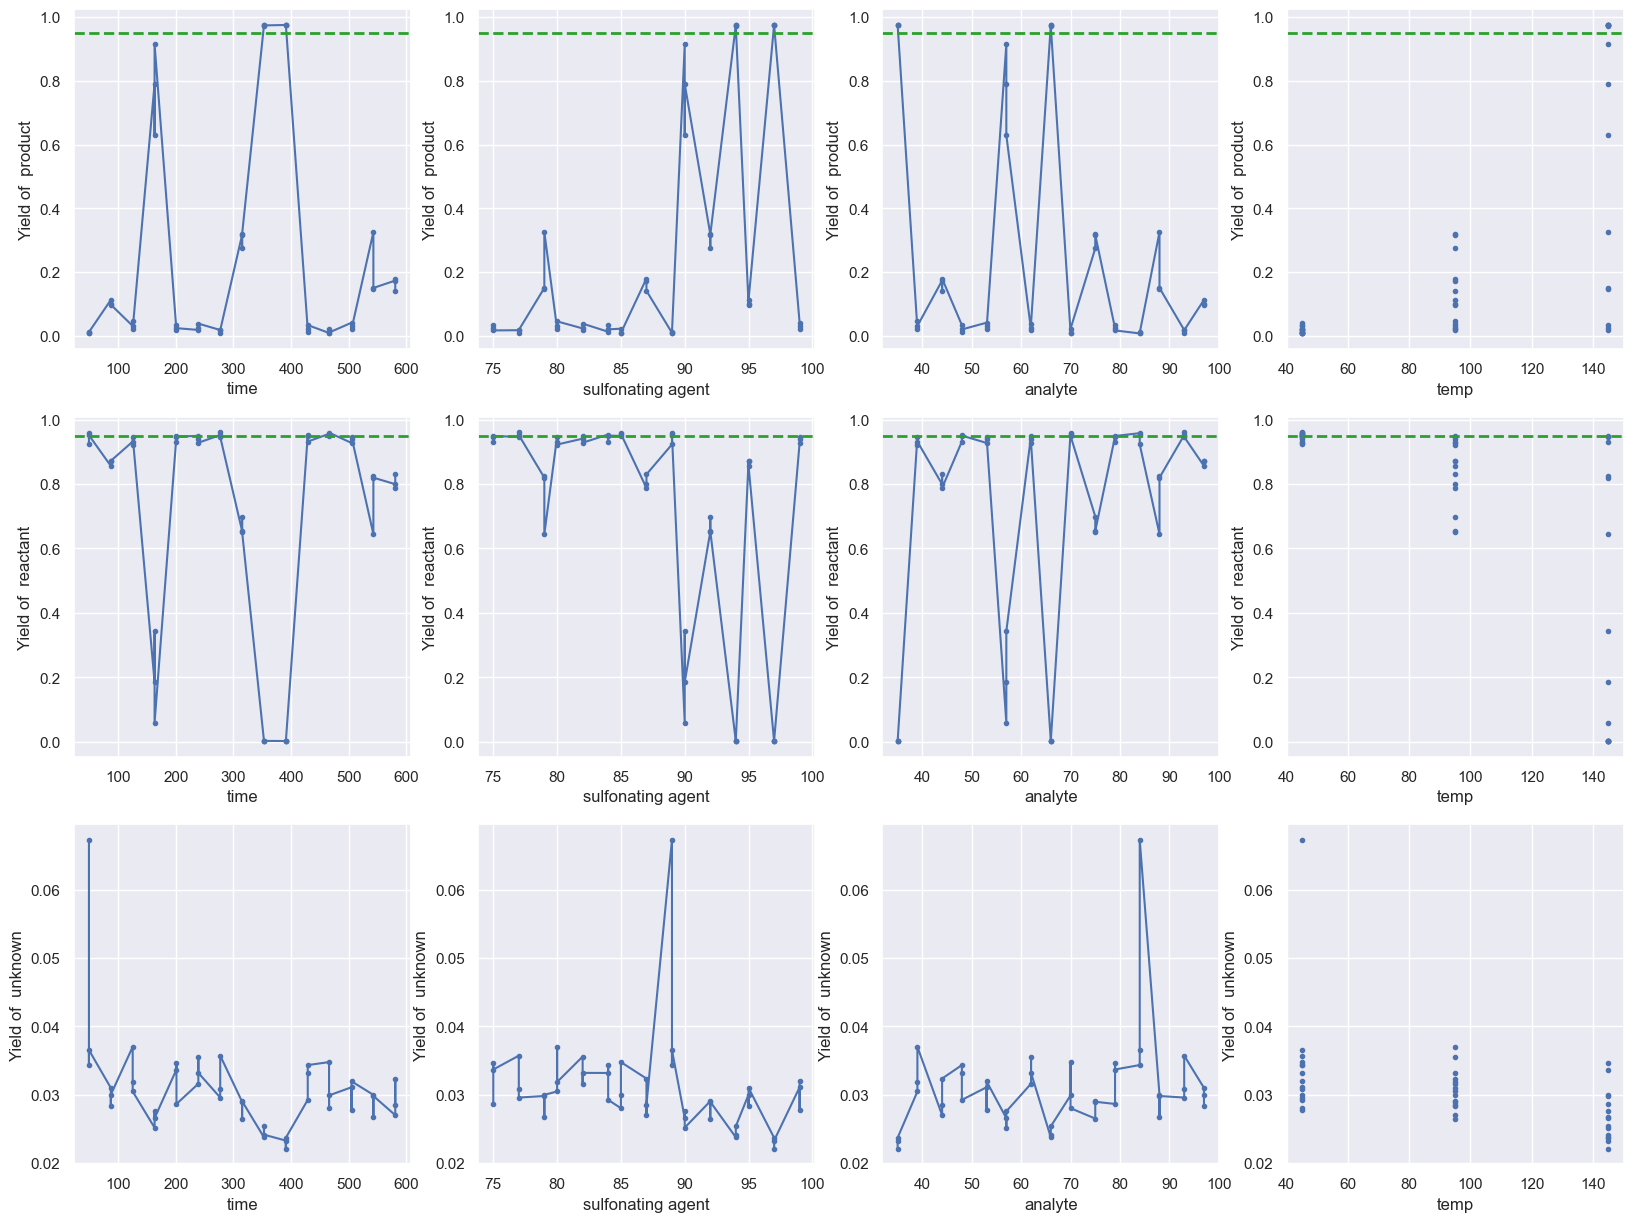

In [93]:
# time = np.array([element for element in  df_summary['Sample Time (min)']])[:48]
# temp = np.array([element for element in  df_summary['Temperature (degC)']])[:48]
# sulfinating_agent= np.array([element for element in  df_summary['Sulfonating Agent\n(wt%)']])[:48]
# analyte = np.array([element for element in  df_summary['Reagent Ratio\n(mg/mL reagent/sulfonating agent)']])[:48]
# time_52.sort()
# time_02.sort()
label_x= ['time','sulfonating agent','analyte','temp']
x_data = [time,sulfonating_agent,analyte,temp]
y_data = [yield_prod,yield_react,yield_unknown]#[product,reactant,product/reactant,unknown]
line = ['.-','.-','.-','.']

label_y = ['product','reactant','unknown']#['product','reactant','ratio','unknown'] 
count = 0

# Dot markers
# fig = plt.figure(figsize=(20,15))
# for i in range(len(y_data)):
#     for j in range(len(x_data)):
#         count +=1
#         plt.subplot(len(y_data),len(x_data),count)
#         plt.plot(x_data[j],y_data[i],'.')
#         plt.title('Area of %s'%label_y[i])
#         plt.ylabel('Area')
#         plt.xlabel('%s'%(label_x[j]))

count = 0
fig = plt.figure(figsize=(20,15))
for i in range(len(y_data)):
    for j in range(len(x_data)):
        count +=1
        pair = np.array([x_data[j],y_data[i]]).transpose()
        pair = pair[pair[:,0].argsort()]
        plt.subplot(len(y_data),len(x_data),count)
        #plt.plot(x_data[j].reshape(-1,3).mean(axis=1),area.reshape(-1,3).mean(axis=1),'.-')
        #plt.plot(pair[:,0].reshape(-1,3).mean(axis=1)[1:],pair[:,1].reshape(-1,3).mean(axis=1)[1:],'.-')
        #plt.plot(pair[:,0].reshape(-1,3).mean(axis=1)[1:],pair[:,1].reshape(-1,3).max(axis=1)[1:],'.-')
        plt.plot(pair[:,0],pair[:,1],line[j])
        if label_y[i] != 'unknown':
            plt.axhline(y=0.95, color='tab:green',linestyle = '--' ,linewidth=2)
        plt.xlabel(label_x[j])
        plt.ylabel('Yield of  %s'%label_y[i])

#pair[pair[:,0].argsort()]

In [94]:
pair = np.array([x_data[j],yield_prod]).transpose()
pair = pair[pair[:,0].argsort()]


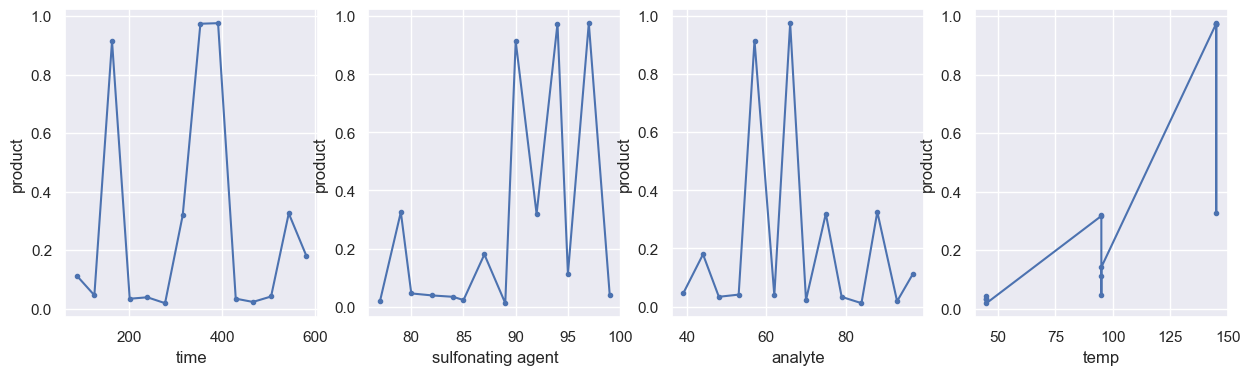

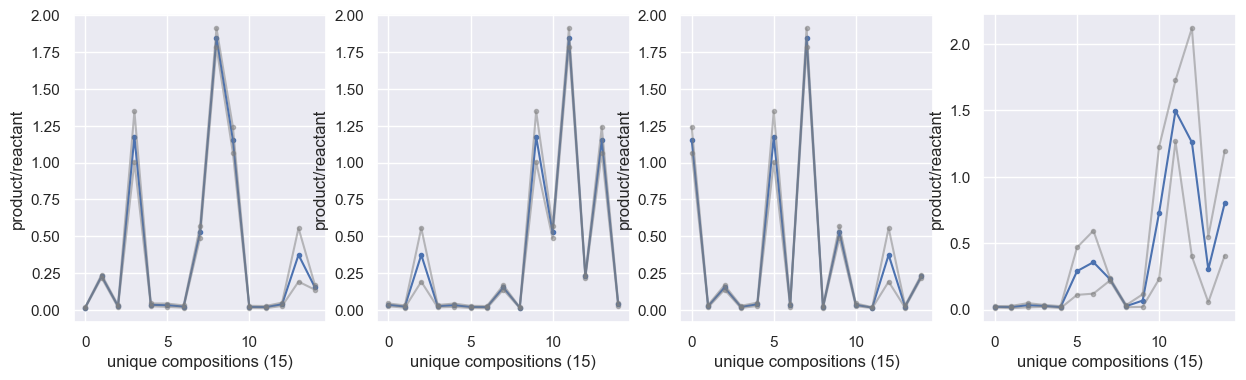

array([ 45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,  45.,
        45.,  45.,  45.,  45.,  95.,  95.,  95.,  95.,  95.,  95.,  95.,
        95.,  95.,  95.,  95.,  95.,  95.,  95.,  95., 145., 145., 145.,
       145., 145., 145., 145., 145., 145., 145., 145., 145., 145., 145.,
       145.])

In [109]:
fig = plt.figure(figsize=(15,4))
for j in range(4):
    pair = np.array([x_data[j],yield_prod]).transpose()
    pair = pair[pair[:,0].argsort()]
    plt.subplot(1,len(x_data),j+1)
    #plt.plot(x_data[j].reshape(-1,3).mean(axis=1),area.reshape(-1,3).mean(axis=1),'.-')
    #plt.plot(pair[:,0].reshape(-1,3).mean(axis=1)[1:],pair[:,1].reshape(-1,3).mean(axis=1)[1:],'.-')
    plt.plot(pair[:,0].reshape(-1,3).mean(axis=1)[1:],pair[:,1].reshape(-1,3).max(axis=1)[1:],'.-')
    plt.xlabel(label_x[j])
    plt.ylabel('product')


plt.show()
fig = plt.figure(figsize=(15,4))
for j in range(4):
    pair = np.array([x_data[j],product]).transpose()
    pair = pair[pair[:,0].argsort()]
    plt.subplot(1,len(x_data),j+1)
    #plt.plot(x_data[j].reshape(-1,3).mean(axis=1),area.reshape(-1,3).mean(axis=1),'.-')
    #plt.plot(pair[:,0].reshape(-1,3).mean(axis=1)[1:],pair[:,1].reshape(-1,3).mean(axis=1)[1:],'.-')
    plt.plot(pair[:,1].reshape(-1,3).mean(axis=1)[:],'.-')
    plt.plot(pair[:,1].reshape(-1,3).mean(axis=1)[:]+pair[:,1].reshape(-1,3).std(axis=1)[:],'.-',color='tab:grey',alpha = 0.5)
    plt.plot(pair[:,1].reshape(-1,3).mean(axis=1)[:]-pair[:,1].reshape(-1,3).std(axis=1)[:],'.-',color='tab:grey',alpha = 0.5)
    # plt.plot(pair[:,1].reshape(-1,3).max(axis=1)[:],'.-',color='tab:grey',alpha = 0.5)
    # plt.plot(pair[:,1].reshape(-1,3).min(axis=1)[:],'.-',color='tab:grey', alpha = 0.5)
    
    plt.xlabel('unique compositions (15)')
    plt.ylabel('product/reactant')
plt.show()
pair[:,0] 

In [96]:
data_102119 = pd.DataFrame({
    'time': time,
    'temp': temp,
    'sulf': sulfonating_agent,
    'analyte': analyte,
    'area product': product,
    'area reactant': reactant,
    'area unknown': unknown,
    'yield product': yield_prod,
    'yield reactant': yield_react,
    'yield unknown': yield_unknown
})
data_102119.sort_values('temp').head(11)

time  temp  sulf  analyte  area product  area reactant  area unknown  \
0     49    45    89       84      0.015948       1.502329      0.109588   
20   277    45    77       93      0.028822       1.514659      0.057182   
30   429    45    84       48      0.018874       0.875505      0.026947   
31   429    45    84       48      0.014015       1.016747      0.035383   
32   429    45    84       48      0.031428       0.861774      0.031765   
19   277    45    77       93      0.013226       1.478844      0.047393   
34   466    45    85       70      0.015746       1.423253      0.044354   
33   466    45    85       70      0.030481       1.269644      0.037492   
36   505    45    99       53      0.053922       1.206971      0.040465   
37   505    45    99       53      0.037949       1.147241      0.033854   
38   505    45    99       53      0.026193       1.159689      0.039155   

    yield product  yield reactant  yield unknown  
0        0.009797        0.922883       0.067320  
20       0.018006        0.946270       0.035724  
30       0.020485        0.950267       0.029248  
31       0.013145        0.953667       0.033188  
32       0.033977        0.931681       0.034341  
19       0.008591        0.960624       0.030785  
34       0.010615        0.959484       0.029901  
33       0.022787        0.949183       0.028029  
36       0.041435        0.927471       0.031094  
37       0.031130        0.941098       0.027771  
38       0.021382        0.946656       0.031962

In [97]:
data = pd.DataFrame({
    'time': time,
    'temp': temp,
    'sulf': sulfonating_agent,
    'analyte': analyte,
    'Output': yield_prod
})
data.sort_values('analyte')[['analyte','Output']]

analyte    Output
28       35  0.975744
27       35  0.974576
29       35  0.974310
8        39  0.022566
7        39  0.045667
6        39  0.031313
43       44  0.173592
44       44  0.141507
42       44  0.179826
32       48  0.033977
31       48  0.013145
30       48  0.020485
36       53  0.041435
37       53  0.031130
38       53  0.021382
9        57  0.914085
11       57  0.789796
10       57  0.629199
15       62  0.018849
16       62  0.023607
17       62  0.038680
24       66  0.973814
26       66  0.973261
25       66  0.971843
34       70  0.010615
35       70  0.009442
33       70  0.022787
22       75  0.274474
21       75  0.319280
23       75  0.316806
14       79  0.024327
13       79  0.033746
12       79  0.017305
1        84  0.007847
2        84  0.012064
0        84  0.009797
39       88  0.325549
40       88  0.147210
41       88  0.150431
18       93  0.018577
19       93  0.008591
20       93  0.018006
3        97  0.112870
5        97  0.098064
4        97  0.100768

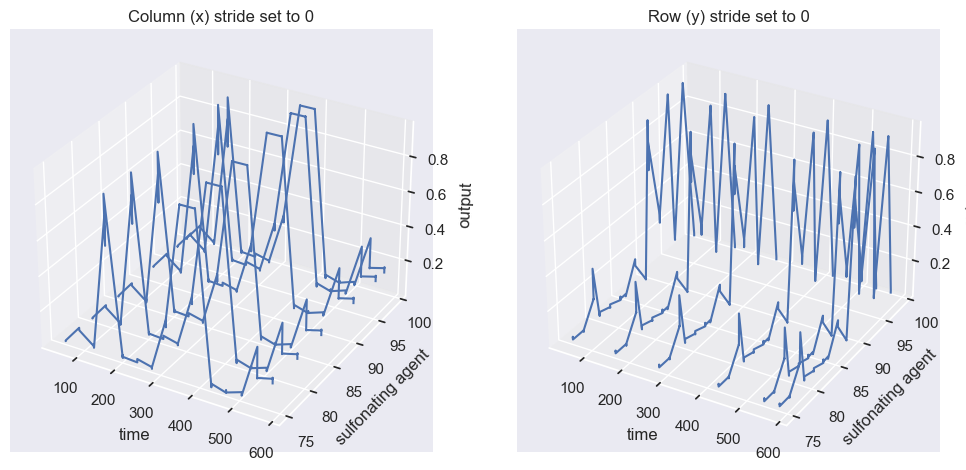

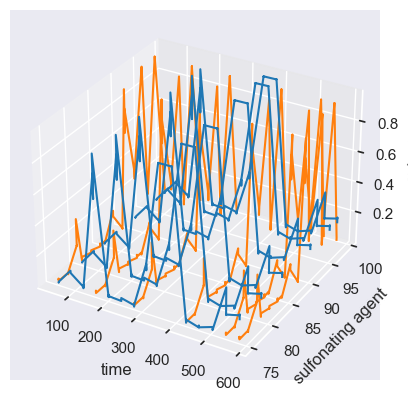

In [98]:
#Example
from mpl_toolkits.mplot3d import axes3d
from matplotlib.animation import FuncAnimation

# Grab some test data.
# X, Y, Z = axes3d.get_test_data(0.05)
X = data.sort_values('time')['time'] #temp_145['Input1'].to_numpy()
Y = data.sort_values('sulf')['sulf'] #temp_145['Input2'].to_numpy()
X, Y = np.meshgrid(X, Y)
#Z = np.matmul(ratio.reshape(45,1),np.ones([1,45]))
Z1,Z2 = np.meshgrid(data.sort_values('time')['Output'].to_numpy(), data.sort_values('sulf')['Output'].to_numpy())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), subplot_kw={'projection': '3d'})

# Give the first plot only wireframes of the type y = c
ax1.plot_wireframe(X, Y, Z1, rstride=10, cstride=0)
#ax1.scatter(X, Y, Z1,'.') 
ax1.set_title("Column (x) stride set to 0")
ax1.set_xlabel('time')
ax1.set_ylabel('sulfonating agent')
ax1.set_zlabel('output')

# Give the second plot only wireframes of the type x = c
ax2.plot_wireframe(X, Y, Z2, rstride=0, cstride=10)
#ax2.scatter(X, Y, Z2,'.') 
ax2.set_title("Row (y) stride set to 0")
ax2.set_xlabel('time')
ax2.set_ylabel('sulfonating agent')
ax2.set_zlabel('output')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z1, rstride=10, cstride=0,color ='tab:blue')
ax.plot_wireframe(X, Y, Z2, rstride=0, cstride=10,color ='tab:orange')
ax.set_xlabel('time')
ax.set_ylabel('sulfonating agent')
ax.set_zlabel('output')


plt.show()

In [99]:
def wireframe_separate(data_temp,input1,input2,output):
    # Grab some test data.
    # X, Y, Z = axes3d.get_test_data(0.05)
    X = data_temp.sort_values(input1)[input1].to_numpy()
    Y = data_temp.sort_values(input2)[input2].to_numpy()
    X, Y = np.meshgrid(X, Y)
    #Z = np.matmul(ratio.reshape(45,1),np.ones([1,45]))
    Z1,Z2 = np.meshgrid(data_temp.sort_values(input1)[output].to_numpy(), data_temp.sort_values(input2)[output].to_numpy())

    ## Plot the figure
    #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), subplot_kw={'projection': '3d'})

    # Give the first plot only wireframes of the type y = c
    ax1.plot_wireframe(X, Y, Z1, rstride=10, cstride=0)
    #ax1.scatter(X, Y, Z1,'.') 
    ax1.set_title("Column (x) stride set to 0")
    ax1.set_xlabel('time')
    ax1.set_ylabel('Sulfonating agent')
    ax1.set_zlabel('output')

    # Give the second plot only wireframes of the type x = c
    ax2.plot_wireframe(X, Y, Z2, rstride=0, cstride=10,color='tab:orange')
    #ax2.scatter(X, Y, Z2,'.') 
    ax2.set_title("Row (y) stride set to 0")
    ax2.set_xlabel('time')
    ax2.set_ylabel('Sulfonating agent')
    ax2.set_zlabel('output')

def scatter_separate(data_temp,input1,input2,output):
    # Grab some test data.
    # X, Y, Z = axes3d.get_test_data(0.05)
    X = data_temp.sort_values(input1)[input1].to_numpy()
    Y = data_temp.sort_values(input2)[input2].to_numpy()
    X, Y = np.meshgrid(X, Y)
    #Z = np.matmul(ratio.reshape(45,1),np.ones([1,45]))
    Z1,Z2 = np.meshgrid(data_temp.sort_values(input1)[output].to_numpy(), data_temp.sort_values(input2)[output].to_numpy())

    ## Plot the figure
    #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), subplot_kw={'projection': '3d'})

    # Give the first plot only wireframes of the type y = c
    #ax1.plot_wireframe(X, Y, Z1, rstride=10, cstride=0)
    ax1.scatter(X, Y, Z1,'.') 
    ax1.set_title("Column (x) stride set to 0")
    ax1.set_xlabel('time')
    ax1.set_ylabel('sulfinating_agent')
    ax1.set_zlabel('output')

    # Give the second plot only wireframes of the type x = c
    #ax2.plot_wireframe(X, Y, Z2, rstride=0, cstride=10,color='tab:orange')
    ax2.scatter(X, Y, Z2,'.') 
    ax2.set_title("Row (y) stride set to 0")
    ax2.set_xlabel('time')
    ax2.set_ylabel('sulfinating agent')
    ax2.set_zlabel('output')

def scatter_all(ax,data_temp,input1,input2,output):
    # Grab some test data.
    # X, Y, Z = axes3d.get_test_data(0.05)
    X = data_temp.sort_values(input1)[input1].to_numpy()
    Y = data_temp.sort_values(input2)[input2].to_numpy()
    X, Y = np.meshgrid(X, Y)
    #Z = np.matmul(ratio.reshape(45,1),np.ones([1,45]))
    Z1,Z2 = np.meshgrid(data_temp.sort_values(input1)[output].to_numpy(), data_temp.sort_values(input2)[output].to_numpy())

    ## Plot outside 
    # fig = plt.figure()
    # ax = fig.add_subplot(projection='3d')
    ## Plot a basic wireframe.
    #ax.plot_wireframe(X, Y, Z1, rstride=10, cstride=0)
    ax.scatter3D(X, Y, Z1,'.')
    #ax.plot_wireframe(X, Y, Z2, rstride=0, cstride=10)
    ax.scatter3D(X, Y, Z2,'.')
    ax.set_xlabel(input1)
    ax.set_ylabel(input2)
    ax.set_zlabel('output')

def wireframe_all(ax,data_temp,input1,input2,output):
        # Grab some test data.
    # X, Y, Z = axes3d.get_test_data(0.05)
    X = data_temp.sort_values(input1)[input1].to_numpy()
    Y = data_temp.sort_values(input2)[input2].to_numpy()
    X, Y = np.meshgrid(X, Y)
    #Z = np.matmul(ratio.reshape(45,1),np.ones([1,45]))
    Z1,Z2 = np.meshgrid(data_temp.sort_values(input1)[output].to_numpy(), data_temp.sort_values(input2)[output].to_numpy())

    ## Plot outside 
    # fig = plt.figure()
    # ax = fig.add_subplot(projection='3d')
    ## Plot a basic wireframe.
    #ax.plot_wireframe(X, Y, Z1, rstride=10, cstride=0,color='tab:grey')
    ax.plot_surface(X, Y, Z1,alpha=0.3)
    #ax.plot_wireframe(X, Y, Z2, rstride=0, cstride=10,color='tab:blue')
    ax.plot_surface(X, Y, Z2,alpha=0.3)
    #ax.view_init(elev=20, azim=120) 
    ax.set_xlabel(input1)
    ax.set_ylabel(input2)
    ax.set_zlabel('output')


def surface_all(ax,data_temp,input1,input2,output,color):
        # Grab some test data.
    # X, Y, Z = axes3d.get_test_data(0.05)
    X = data_temp.sort_values(input1)[input1].to_numpy()
    Y = data_temp.sort_values(input2)[input2].to_numpy()
    X, Y = np.meshgrid(X, Y)
    out1,out2 = data_temp.sort_values(input1)[output].to_numpy(),data_temp.sort_values(input2)[output].to_numpy() #data_temp[output].to_numpy(),data_temp[output].to_numpy()#
    Z = np.matmul(out1.reshape(len(out1),1),out2.reshape(1,len(out2)))
    #Z1,Z2 = np.meshgrid(data_temp.sort_values(input1)[output].to_numpy(), data_temp.sort_values(input2)[output].to_numpy())

    ## Plot outside 
    # fig = plt.figure()
    # ax = fig.add_subplot(projection='3d')
    ## Plot a basic wireframe.
    #ax.plot_wireframe(X, Y, Z1, rstride=10, cstride=0,color='tab:grey')
    ax.plot_surface(X, Y, Z,alpha= 0.3,color=color)
 
    #ax.view_init(elev=20, azim=120) 
    ax.set_xlabel(input1)
    ax.set_ylabel(input2)
    ax.set_zlabel('output')
    
    # ax.set_xlim(0, 300)  # Confine x-axis
    # ax.set_ylim(40, 200)  # Confine y-axis


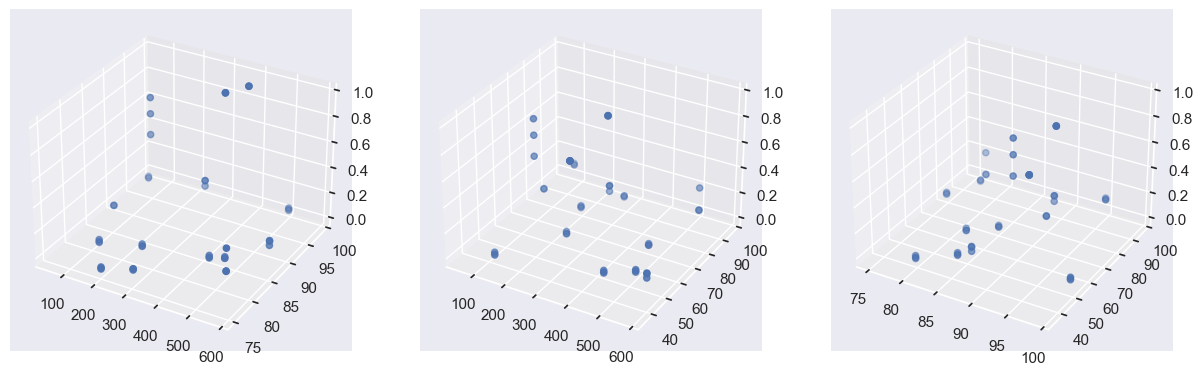

In [120]:

fig,(ax,ax1,ax2) = plt.subplots(1, 3, figsize=(15, 8), subplot_kw={'projection': '3d'})

ax.scatter3D(data['time'], data['sulf'], data["Output"])
ax1.scatter3D(data['time'], data['analyte'], data["Output"]) 
ax2.scatter3D(data['sulf'], data['analyte'], data["Output"]) 

In [100]:
temp_45 = data[data['temp'] == 45]
temp_95 = data[data['temp'] == 95]
temp_145 = data[data['temp'] == 145]

temp_145

time  temp  sulf  analyte    Output
9    163   145    90       57  0.914085
10   163   145    90       57  0.629199
11   163   145    90       57  0.789796
12   201   145    75       79  0.017305
13   201   145    75       79  0.033746
14   201   145    75       79  0.024327
24   353   145    94       66  0.973814
25   353   145    94       66  0.971843
26   353   145    94       66  0.973261
27   391   145    97       35  0.974576
28   391   145    97       35  0.975744
29   391   145    97       35  0.974310
39   543   145    79       88  0.325549
40   543   145    79       88  0.147210
41   543   145    79       88  0.150431

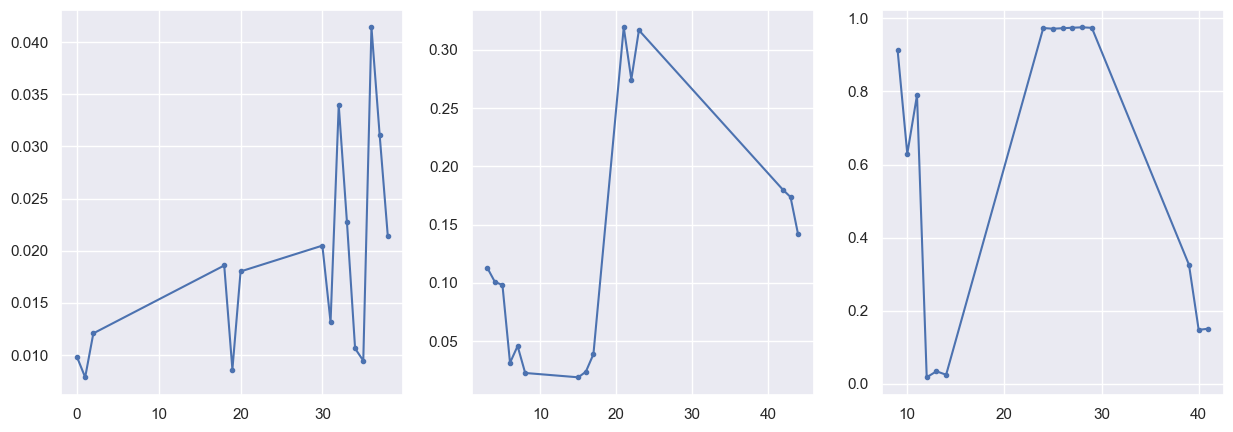

In [101]:
fig,(ax,ax1,ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax.plot(temp_45['Output'],'.-') # <-- all zero since all below 0.02
ax1.plot(temp_95['Output'],'.-')
ax2.plot(temp_145['Output'],'.-') 

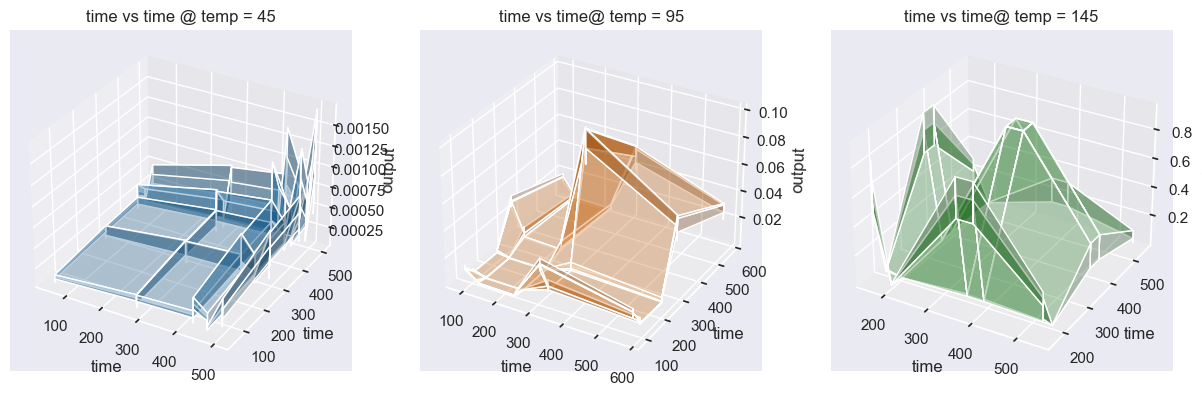

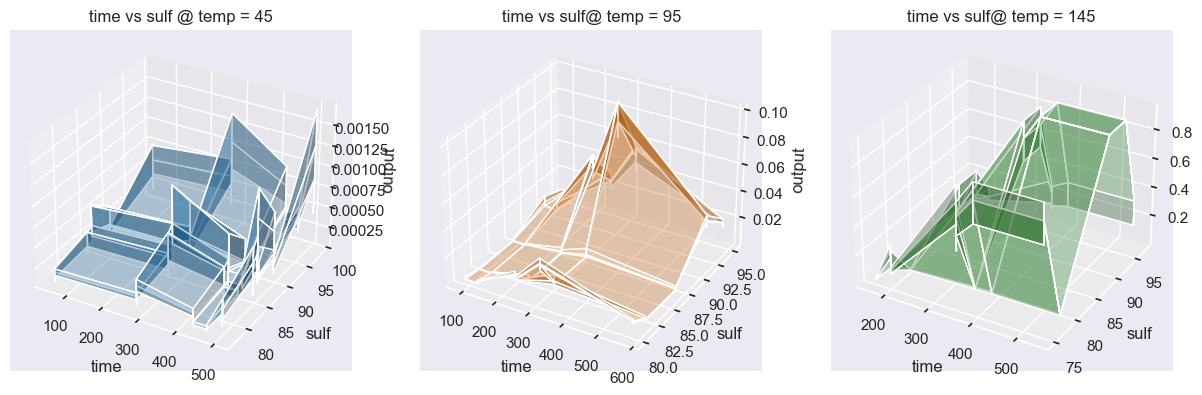

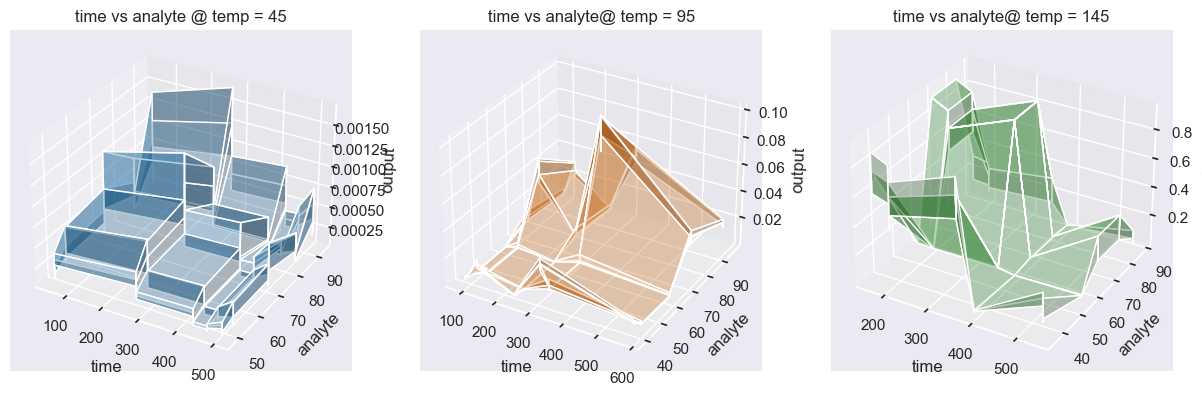

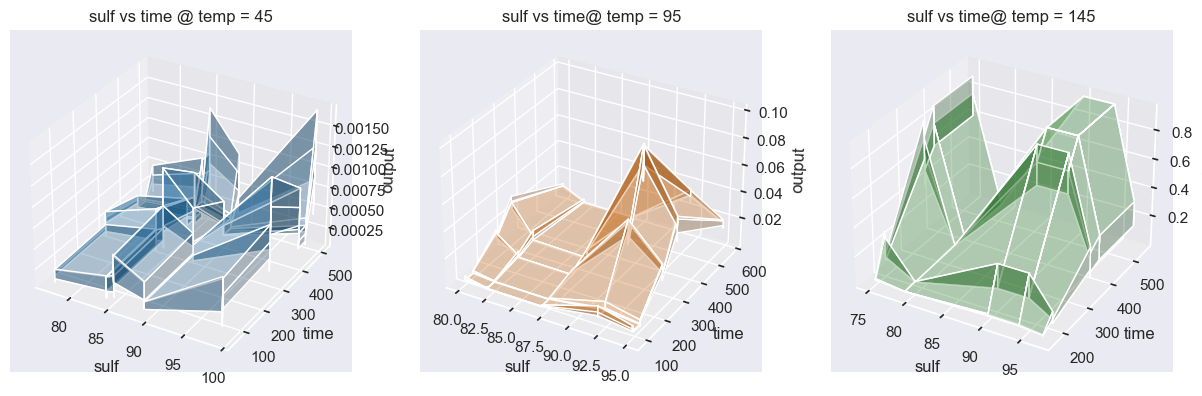

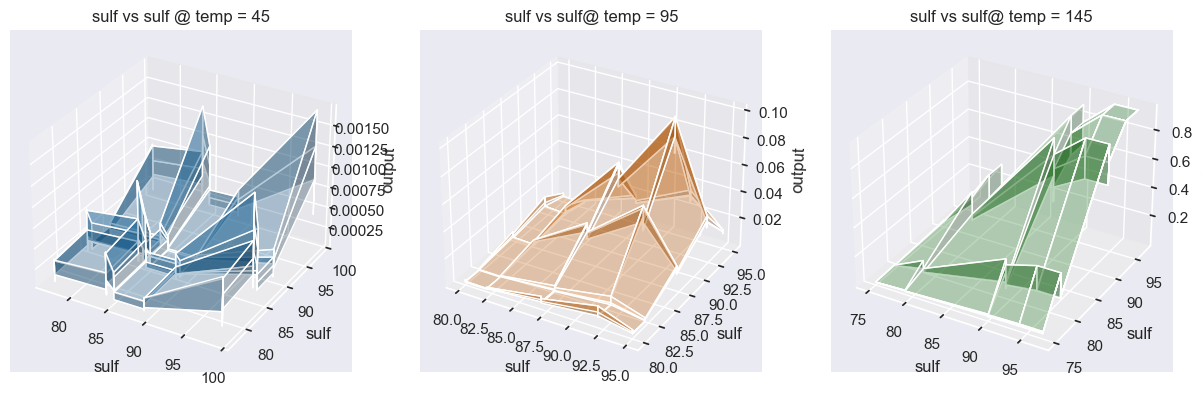

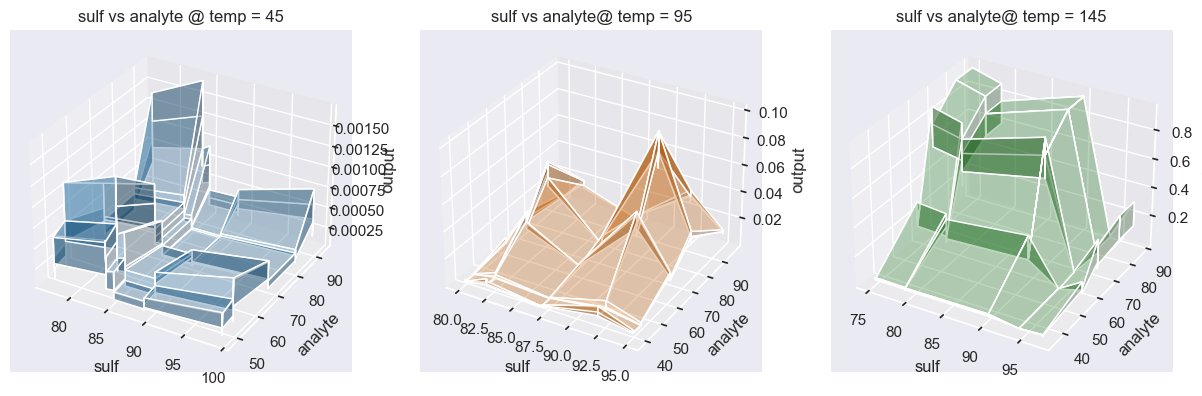

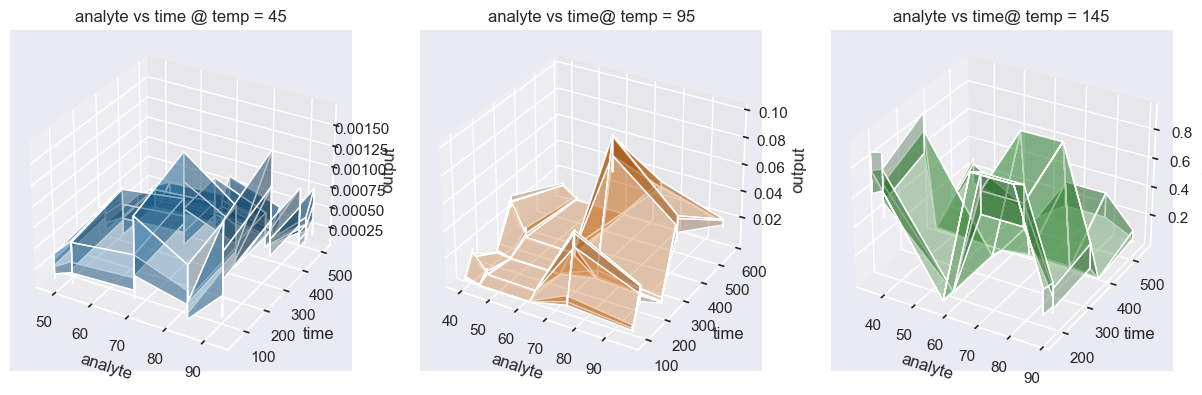

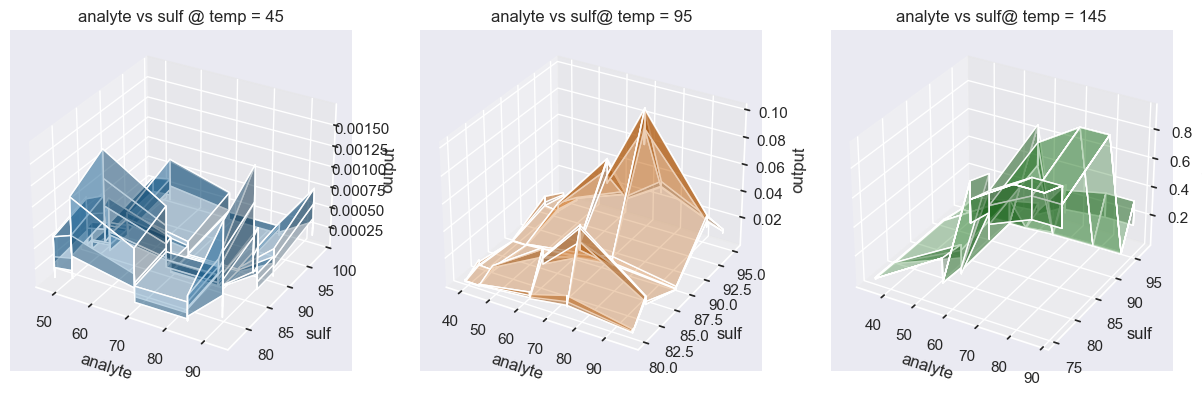

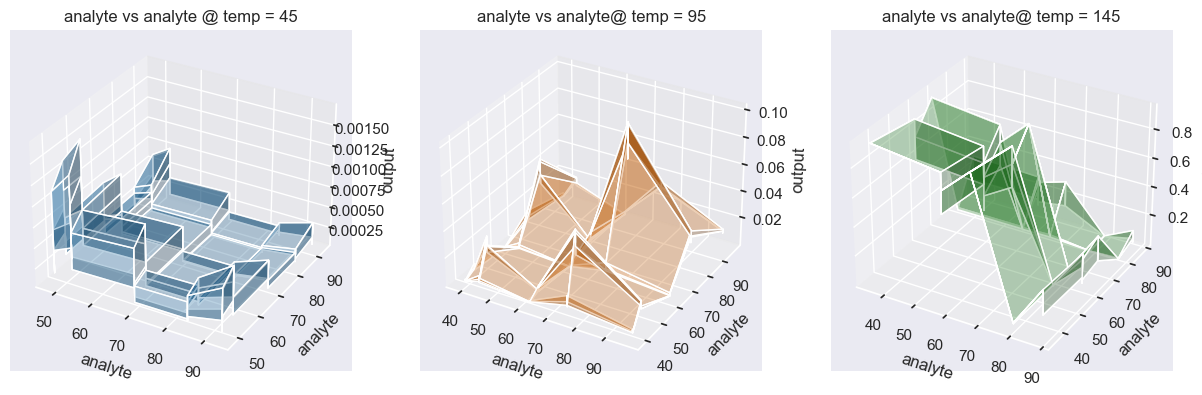

In [102]:
# Surface plots - Temp cmparison
#fig,(ax,ax1,ax2) = plt.subplots(1, 3, figsize=(15, 8), subplot_kw={'projection': '3d'})
param = ['time','sulf','analyte']
color = ['tab:blue','tab:orange','tab:green']
# ax = fig.add_subplot(projection='3d')

for i in range(3):
    for j in range(3):
        fig,(ax,ax1,ax2) = plt.subplots(1, 3, figsize=(15, 8), subplot_kw={'projection': '3d'})
        surface_all(ax,temp_45,param[i] ,param[j],'Output','tab:blue')
        ax.set_title('%s'%param[i] +' vs %s'%param[j] +' @ temp = 45')
        #ax1 = fig.add_subplot(projection='3d')
        surface_all(ax1,temp_95,param[i],param[j],'Output','tab:orange')
        ax1.set_title('%s'%param[i] +' vs %s'%param[j] + '@ temp = 95')
        #ax2 = fig.add_subplot(projection='3d')
        surface_all(ax2,temp_145,param[i],param[j],'Output','tab:green')
        ax2.set_title('%s'%param[i] +' vs %s'%param[j] +'@ temp = 145')

Text(0.5, 0.92, 'sulfonating agent vs analyte')

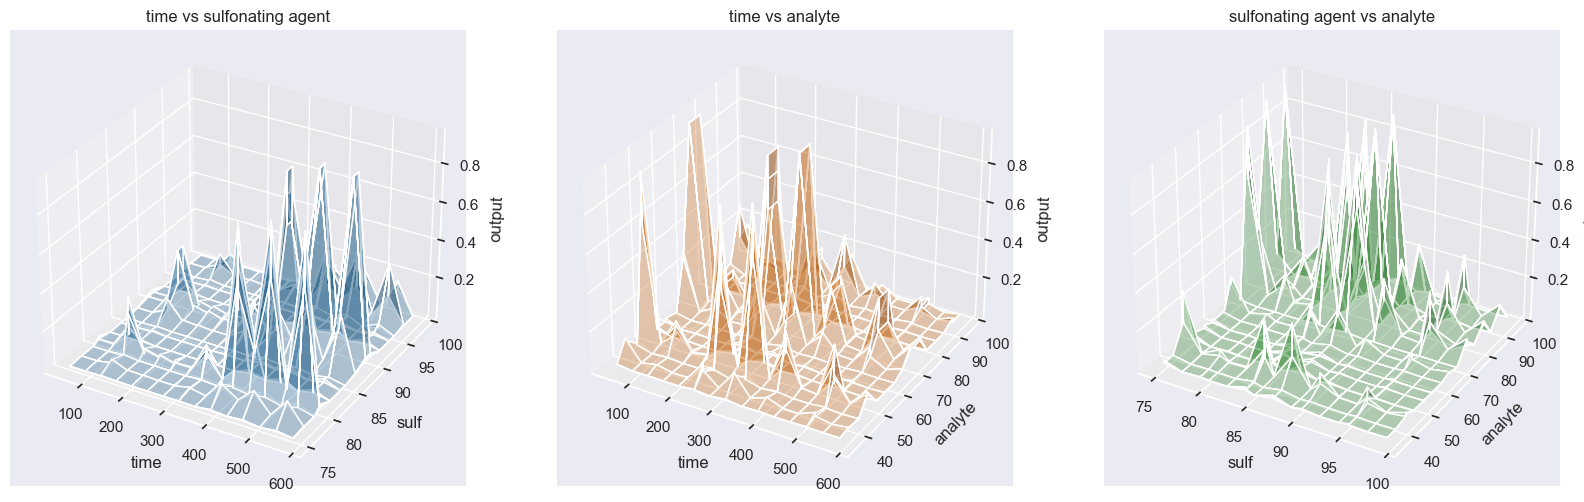

In [103]:
# Surface plots
fig,(ax,ax1,ax2) = plt.subplots(1, 3, figsize=(20, 8), subplot_kw={'projection': '3d'})

# fig = plt.figure(figsize=(15, 8))
# ax = fig.add_subplot(projection='3d')
surface_all(ax,data,'time','sulf','Output','tab:blue')
#ax.scatter(data['time'], data['sulf'], data['Output'], c='b', marker='o')  # 'c' is the color and 'marker' defines the shape of markers
ax.set_title('time vs sulfonating agent')

#ax1 = fig.add_subplot(projection='3d')
surface_all(ax1,data,'time','analyte','Output','tab:orange')
#ax1.scatter(data['time'], data['analyte'], data['Output'], c='r', marker='o')  # 'c' is the color and 'marker' defines the shape of markers
ax1.set_title('time vs analyte')

#ax2 = fig.add_subplot(projection='3d')
surface_all(ax2,data,'sulf','analyte','Output','tab:green')
#ax2.scatter(data['sulf'], data['analyte'], data['Output'], c='g', marker='o')  # 'c' is the color and 'marker' defines the shape of markers
ax2.set_title('sulfonating agent vs analyte')


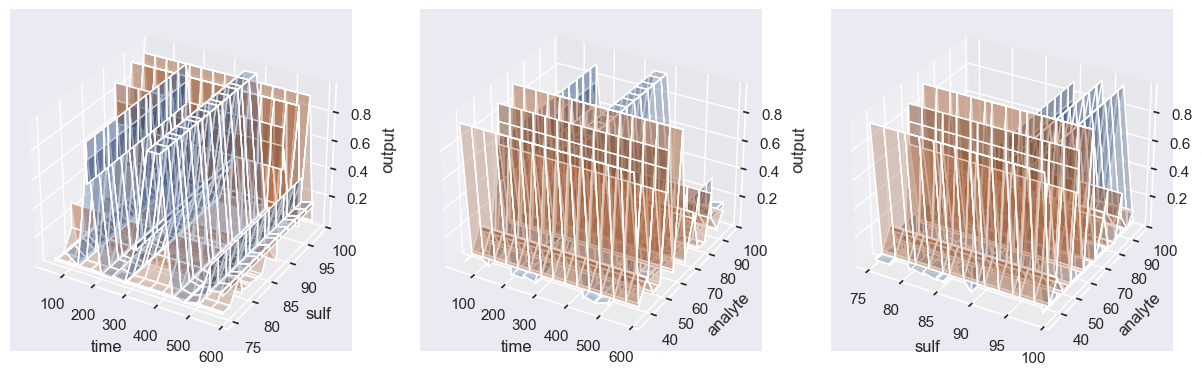

In [104]:
# Plot Together
fig,(ax,ax1, ax2) = plt.subplots(1, 3, figsize=(15, 8), subplot_kw={'projection': '3d'})
wireframe_all(ax,data,'time','sulf','Output')
# scatter_all(ax,temp_45,'time','sulf','Output')
# scatter_all(ax,temp_95,'time','sulf','Output')
# scatter_all(ax,temp_145,'time','sulf','Output')

#ax1 = fig.add_subplot(projection='3d')
wireframe_all(ax1,data,'time','analyte','Output')
# scatter_all(ax1,temp_45,'time','analyte','Output')
# scatter_all(ax1,temp_95,'time','analyte','Output')
# scatter_all(ax1,temp_145,'time','analyte','Output')

#ax2 = fig.add_subplot(projection='3d')
wireframe_all(ax2,data,'sulf','analyte','Output')
# scatter_all(ax2,temp_45,'sulf','analyte','Output')
# scatter_all(ax2,temp_95,'sulf','analyte','Output')
# scatter_all(ax2,temp_145,'sulf','analyte','Output')

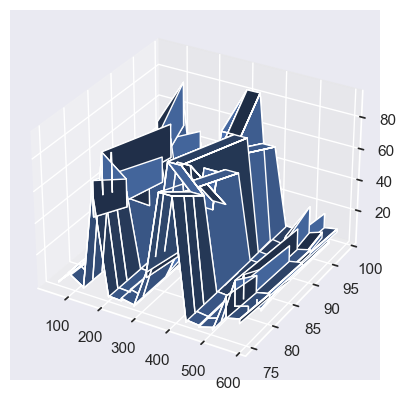

In [105]:
time_prod = np.matmul(time.reshape(time.shape[0],1), yield_prod.reshape(1,yield_prod.shape[0]))
sulf_prod = np.matmul(sulfonating_agent.reshape(sulfonating_agent.shape[0],1), yield_prod.reshape(1,yield_prod.shape[0]))
analyte_prod = np.matmul(analyte.reshape(analyte.shape[0],1), yield_prod.reshape(1,yield_prod.shape[0]))
temp_prod = np.matmul(temp.reshape(analyte.shape[0],1), yield_prod.reshape(1,yield_prod.shape[0]))


X = time
Y = sulfonating_agent
X, Y = np.meshgrid(X, Y)
Z= analyte_prod
#Z1,Z2 = np.meshgrid(data_temp.sort_values(input1)[output].to_numpy(), data_temp.sort_values(input2)[output].to_numpy())

## Plot outside 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
## Plot a basic wireframe.
#ax.plot_wireframe(X, Y, Z1, rstride=10, cstride=0,color='tab:grey')
ax.plot_surface(X, Y, Z, alpha= 1)

